In [1]:
from meerkat import ds3231, parser

import pandas as pd

from importlib import reload

In [2]:
rtc = ds3231.DS3231(bus_n=1, bus_addr=0x68)

In [3]:
rtc.get_time()

(2020, 11, 13, 17, 48, 52)

In [4]:
rtc.get_temp()

21.75

In [5]:
rtc.publish(description="test_1", n=1)

'{"description": "test_1", "sample_n": 0, "rtc_time": "2020-11-13 17:48:52", "temp_C": 21.75, "std_time_ms": "2020-11-13 16:49:53.810215"}'

In [6]:
rtc.publish(description="test_1", n=2, delay=3)

['{"description": "test_1", "sample_n": 0, "rtc_time": "2020-11-13 17:48:53", "temp_C": 21.75, "std_time_ms": "2020-11-13 16:49:55.004305"}',
 '{"description": "test_1", "sample_n": 0, "rtc_time": "2020-11-13 17:48:56", "temp_C": 21.75, "std_time_ms": "2020-11-13 16:49:58.009711"}']

In [7]:
# default writer format is CSV, switch to JSON
rtc.writer_output = 'json'

In [8]:
# writer method with description and sample number
rtc.write(description='test_2', n=6, delay=1)

In [9]:
rtc.json_writer.path

'2020_11_13_16_50_01_ds3231.jsontxt'

In [10]:
with open(rtc.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_2", "sample_n": 0, "rtc_time": "2020-11-13 17:48:59", "temp_C": 21.75, "std_time_ms": "2020-11-13 16:50:01.075585"}
{"description": "test_2", "sample_n": 1, "rtc_time": "2020-11-13 17:49:00", "temp_C": 21.75, "std_time_ms": "2020-11-13 16:50:02.079463"}
{"description": "test_2", "sample_n": 2, "rtc_time": "2020-11-13 17:49:01", "temp_C": 21.75, "std_time_ms": "2020-11-13 16:50:03.083140"}
{"description": "test_2", "sample_n": 3, "rtc_time": "2020-11-13 17:49:02", "temp_C": 21.75, "std_time_ms": "2020-11-13 16:50:04.086844"}


In [11]:
# switch back to CSV format
rtc.writer_output = 'csv'

In [12]:
rtc.write(description='test_3', n=6, delay=1)

In [13]:
m, df = parser.csv_resource(rtc.csv_writer.path)

In [14]:
df["rtc_datetime64_ns"] = pd.to_datetime(df.rtc_time)
df.temp_C = df.temp_C.astype(float)

In [15]:
df.dtypes

std_time_ms                  object
description                  object
sample_n                      int64
rtc_time                     object
temp_C                      float64
datetime64_ns        datetime64[ns]
rtc_datetime64_ns    datetime64[ns]
dtype: object

In [16]:
df

,std_time_ms,description,sample_n,rtc_time,temp_C,datetime64_ns,rtc_datetime64_ns
0,2020-11-13 16:50:07.206736,test_3,0,2020-11-13 17:49:05,21.75,2020-11-13 16:50:07.206736,2020-11-13 17:49:05
1,2020-11-13 16:50:08.210228,test_3,1,2020-11-13 17:49:06,21.75,2020-11-13 16:50:08.210228,2020-11-13 17:49:06
2,2020-11-13 16:50:09.213845,test_3,2,2020-11-13 17:49:07,21.75,2020-11-13 16:50:09.213845,2020-11-13 17:49:07
3,2020-11-13 16:50:10.217418,test_3,3,2020-11-13 17:49:08,21.75,2020-11-13 16:50:10.217418,2020-11-13 17:49:08
4,2020-11-13 16:50:11.220994,test_3,4,2020-11-13 17:49:09,21.75,2020-11-13 16:50:11.220994,2020-11-13 17:49:09
5,2020-11-13 16:50:12.224525,test_3,5,2020-11-13 17:49:10,21.75,2020-11-13 16:50:12.224525,2020-11-13 17:49:10


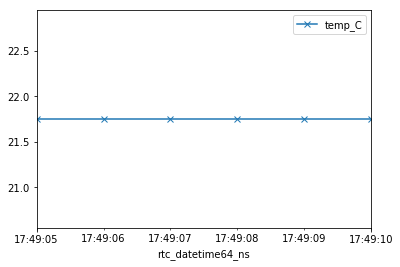

In [17]:
df[["rtc_datetime64_ns", "temp_C"]].plot(x="rtc_datetime64_ns", marker="x");